In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20


# reading the data
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
IdLook = pd.read_csv('IdLookupTable.csv')



In [35]:
train.head(5).T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
mouth_center_bottom_lip_x      33
mouth_center_bottom_lip_y      33
mouth_center_top_lip_y       4774
mouth_center_top_lip_x       4774
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
right_eyebrow_inner_end_x    4779
mouth_right_corner_y         4779
mouth_right_corner_x         4779
right_eyebrow_inner_end_y    4779
left_eyebrow_inner_end_y     4779
left_eyebrow_inner_end_x     4779
mouth_left_corner_x          4780
mouth_left_corner_y          4780
right_eye_outer_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_inner_corner_x     4781
left_eye_outer_corner_y      4782
left_eye_outer_corner_x      4782
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
dtype: int64


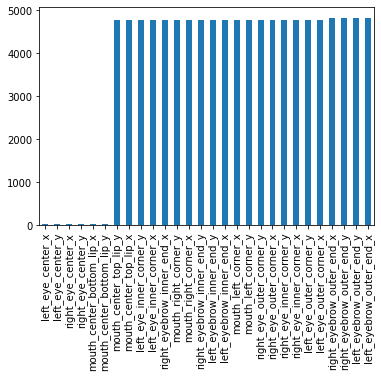

In [36]:
# checking missing values
missing = train.isnull().sum()
bar_missing = missing[missing>0].sort_values()
print(bar_missing)
bar_missing.plot.bar()

In [37]:
# missing values
# from pandas docs: " ffill: propagate last valid observation forward to next valid backfill"
training = train.fillna(method='ffill')
missing = training.isnull().sum()
bar_missing = missing[missing>0].sort_values()
print(bar_missing)

Series([], dtype: int64)


In [38]:
training.shape[0]
#training['Image'][0]

7049

In [39]:
# images in the training set
# constructing an array contains all images
c = []
for i in range(training.shape[0]):
  a = training['Image'][i]
  b = a.split(' ')
  for j in range(96*96):
    c.append(float(b[j]))

In [40]:
# np array for the images in the training set
c = np.array(c)
train_images = c.reshape(-1,96,96,1)
train_images.shape

(7049, 96, 96, 1)

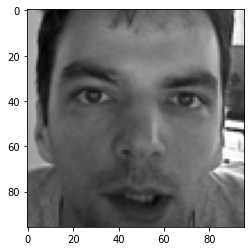

In [41]:
plt.imshow(train_images[5].reshape(96,96),cmap='gray')

In [42]:
#train_images = train_images/.255

In [43]:
# labels for the images
training_y = training.drop(columns = 'Image')
y_train = training_y.values
y_train.shape

(7049, 30)

In [44]:
# creating training and validation sets 
from sklearn.model_selection import train_test_split
X_train, X_valid, yy_train, y_valid = train_test_split(train_images, y_train, test_size = 0.2)

In [45]:
# I used data augmentation, but it seems it does not decrease the mae (mean absolute error)

#from keras_preprocessing.image import ImageDataGenerator

#training_datagen = ImageDataGenerator(
    #  rescale = 1./255,
	   # rotation_range=15,
     # zoom_range=0.2,
     # width_shift_range=0.2,
     # height_shift_range=0.3,
      #shear_range=0.3,
      #fill_mode='nearest'
      #)
#validation_datagen = ImageDataGenerator(rescale = 1./255)

#training_datagen.fit(X_train)
#validation_datagen.fit(X_valid)


In [46]:
# CNN (convolutional neural network) model: 
# Best private Score = 2.46015, Best Public Score = 2.62412


# This model is inspired by the model in https://www.kaggle.com/karanjakhar/facial-keypoint-detection
# we use BatchNormalization since this is a deep network and we need to prevent 
# of happening vanishing or infinity gradients.

from functools import partial

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters= 32, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.3),
                           input_shape=(96, 96, 1), padding = 'same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters= 32, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.3),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    tf.keras.layers.Conv2D(filters= 64, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.2),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters= 64, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.2),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),


    tf.keras.layers.Conv2D(filters= 128, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.1),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters= 128, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.2),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    tf.keras.layers.Conv2D(filters= 256, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.2),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters= 256, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.05),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.2),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), activation=partial(tf.nn.leaky_relu, alpha=0.2),
                           padding = 'same'),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation=partial(tf.nn.leaky_relu, alpha=0.05)),
    tf.keras.layers.Dropout(rate = 0.3),
   # tf.keras.layers.Dense(units = 128, activation=partial(tf.nn.leaky_relu, alpha=0.2)),
  #  tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units = 128, activation=partial(tf.nn.leaky_relu, alpha=0.1)),
    tf.keras.layers.Dropout(rate = 0.1),
    tf.keras.layers.Dense(units = 30)  # 15 (x,y) cooridinates
])

model.summary()


optimizer = tf.keras.optimizers.Adam()
#optimizer = tf.keras.optimizers.RMSprop()


model.compile(loss = 'mean_squared_error', optimizer=optimizer, metrics=['mae'])


from tensorflow.keras.callbacks import LearningRateScheduler



ModelHistory = model.fit(x=X_train, y=yy_train, batch_size=64
                  , epochs=40, steps_per_epoch=X_train.shape[0]//64,
                    validation_data = (X_valid, y_valid),
                    verbose = 2)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 48, 48, 64)       

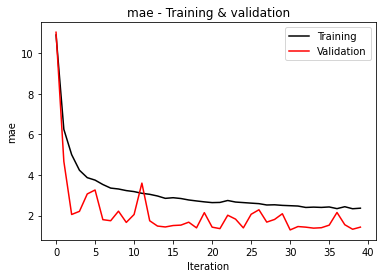

<Figure size 432x288 with 0 Axes>

In [47]:
# mae vs iterations

TrainAcc = ModelHistory.history['mae']
ValAcc = ModelHistory.history['val_mae']
TrainLoss = ModelHistory.history['loss']
ValLoss = ModelHistory.history['val_loss']

Nepochs = range(len(TrainAcc))

plt.plot(Nepochs, TrainAcc, 'k', label='Training')
plt.plot(Nepochs, ValAcc, 'r', label='Validation')
plt.title('mae - Training & validation')
plt.ylabel('mae')
plt.xlabel('Iteration')
plt.legend(loc=0)
plt.figure()


plt.show()

In [48]:
# preparing the test set
testing = test.fillna(method='ffill')
missing = testing.isnull().sum()
bar_missing = missing[missing>0].sort_values()
print(bar_missing)

Series([], dtype: int64)


In [49]:
# the images in the test set
# constructing array containing all images
c = []
for i in range(testing.shape[0]):
  a = testing ['Image'][i]
  b = a.split(' ')
  for j in range(96*96):
    c.append(float(b[j]))

In [50]:
# np array for the images in the test set
c = np.array(c)
test_images = c.reshape(-1,96,96,1)
test_images.shape

(1783, 96, 96, 1)

In [51]:
#test_images = test_images/255

In [52]:
# predicting 
predict = model.predict(test_images)